In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [38]:
Data = pd.read_csv(r"C:\Users\cotjq\OneDrive\Desktop\python_code\Quantum Computing Lab\SVM_Data\SVM_experiment_runs50_20260209_053106.csv")

In [39]:
N_RUNS = 50

In [40]:
gamma = []

C_gap_acc = []
C_gap_auroc = []
C_gap_auprc = []
C_hinge_gap = []

Q_gap_acc_max = []
Q_gap_auroc_max = []
Q_gap_auprc_max = []
Q_hinge_gap_min = []

In [41]:
gamma_list = Data["gamma"]

C_gap_acc_list = Data["C_gap_acc"]
C_gap_auroc_list = Data["C_gap_auroc"]
C_gap_auprc_list = Data["C_gap_auprc"]
C_hinge_gap_list = Data["C_hinge_gap"]

Q_gap_acc_max_list = Data["Q_gap_acc_max"]
Q_gap_auroc_max_list = Data["Q_gap_auroc_max"]
Q_gap_auprc_max_list = Data["Q_gap_auprc_max"]
Q_hinge_gap_min_list = Data["Q_hinge_gap_min"]

In [42]:
for i in range(N_RUNS):
    gamma.append(gamma_list[30*i: 30*(i+1)])

    C_gap_acc.append(C_gap_acc_list[30*i: 30*(i+1)])
    C_gap_auroc.append(C_gap_auroc_list[30*i: 30*(i+1)])
    C_gap_auprc.append(C_gap_auprc_list[30*i: 30*(i+1)])
    C_hinge_gap.append(C_hinge_gap_list[30*i: 30*(i+1)])

    Q_gap_acc_max.append(Q_gap_acc_max_list[30*i: 30*(i+1)])
    Q_gap_auroc_max.append(Q_gap_auroc_max_list[30*i: 30*(i+1)])
    Q_gap_auprc_max.append(Q_gap_auprc_max_list[30*i: 30*(i+1)])
    Q_hinge_gap_min.append(Q_hinge_gap_min_list[30*i: 30*(i+1)])

gamma = gamma[0].T
C_gap_acc = C_gap_acc[0]
C_gap_auroc = C_gap_auroc[0]
C_gap_auprc = C_gap_auprc[0]
C_hinge_gap = C_hinge_gap[0]

Q_gap_acc_max = np.array(Q_gap_acc_max)
Q_gap_auroc_max = np.array(Q_gap_auroc_max)
Q_gap_auprc_max = np.array(Q_gap_auprc_max)
Q_hinge_gap_min = np.array(Q_hinge_gap_min)

In [43]:
Q_gap_acc_max_M = Q_gap_acc_max.max(axis=0)
Q_gap_auroc_max_M = Q_gap_auroc_max.max(axis=0)
Q_gap_auprc_max_M = Q_gap_auprc_max.max(axis=0)
Q_hinge_gap_min_M = Q_hinge_gap_min.max(axis=0)

Q_gap_acc_max_mean = Q_gap_acc_max.mean(axis=0)
Q_gap_auroc_max_mean = Q_gap_auroc_max.mean(axis=0)
Q_gap_auprc_max_mean = Q_gap_auprc_max.mean(axis=0)
Q_hinge_gap_min_mean = Q_hinge_gap_min.mean(axis=0)

Q_gap_acc_max_m = Q_gap_acc_max.min(axis=0)
Q_gap_auroc_max_m = Q_gap_auroc_max.min(axis=0)
Q_gap_auprc_max_m = Q_gap_auprc_max.min(axis=0)
Q_hinge_gap_min_m = Q_hinge_gap_min.min(axis=0)

In [44]:
Acc_lower = Q_gap_acc_max_m
Acc_upper = Q_gap_acc_max_M

Auroc_lower = Q_gap_auroc_max_m
Auroc_upper = Q_gap_auroc_max_M

Auprc_lower = Q_gap_auprc_max_m
Auprc_upper = Q_gap_auprc_max_M

Hinge_lower = Q_hinge_gap_min_m
Hinge_upper = Q_hinge_gap_min_M

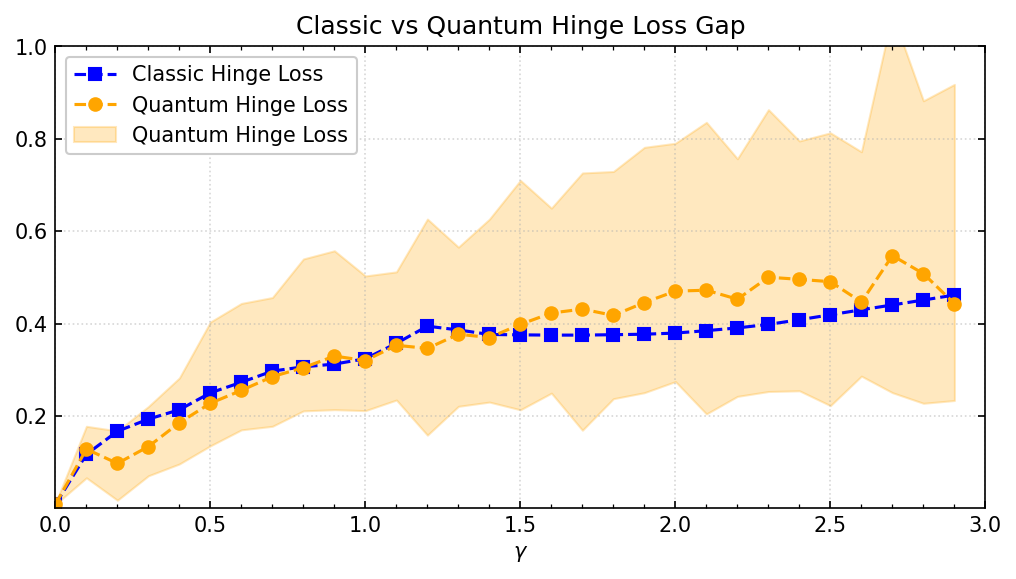

In [45]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

ax.plot(gamma, C_hinge_gap, "s--", color = "blue", label = "Classic Hinge Loss")
ax.plot(gamma, Q_hinge_gap_min_mean, "o--", color = "orange", label = "Quantum Hinge Loss")

ax.fill_between(
    gamma,
    Hinge_lower,
    Hinge_upper,
    color="orange",
    alpha=0.25,
    label = "Quantum Hinge Loss"
)

ax.set_title("Classic vs Quantum Hinge Loss Gap")
ax.set_ylim(1e-6, 1)
ax.set_xlabel(r"$\gamma$")

# x축 범위 (0~3만 쓰는 거면 0~3만 남김)
ax.set_xlim(0, 3)

# x축: 0.5는 큰 눈금(major), 0.1은 작은 눈금(minor)
ax.xaxis.set_major_locator(mticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(0.1))
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# 격자: 큰 눈금 위치에만, 점선, 투명도 50%
ax.grid(which='major', linestyle=':', linewidth=0.8, alpha=0.5)

# 위/오른쪽에도 눈금 + 안쪽 방향
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.legend(loc="upper left", framealpha=1)

plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:40: SyntaxWarning: invalid escape sequence '\g'
<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:40: SyntaxWarning: invalid escape sequence '\g'
C:\Users\cotjq\AppData\Local\Temp\ipykernel_13420\1078238296.py:12: SyntaxWarning: invalid escape sequence '\g'
  axes[0].set_xlabel(u"${\gamma}$")
C:\Users\cotjq\AppData\Local\Temp\ipykernel_13420\1078238296.py:26: SyntaxWarning: invalid escape sequence '\g'
  axes[1].set_xlabel(u"${\gamma}$")
C:\Users\cotjq\AppData\Local\Temp\ipykernel_13420\1078238296.py:40: SyntaxWarning: invalid escape sequence '\g'
  axes[2].set_xlabel(u"${\gamma}$")


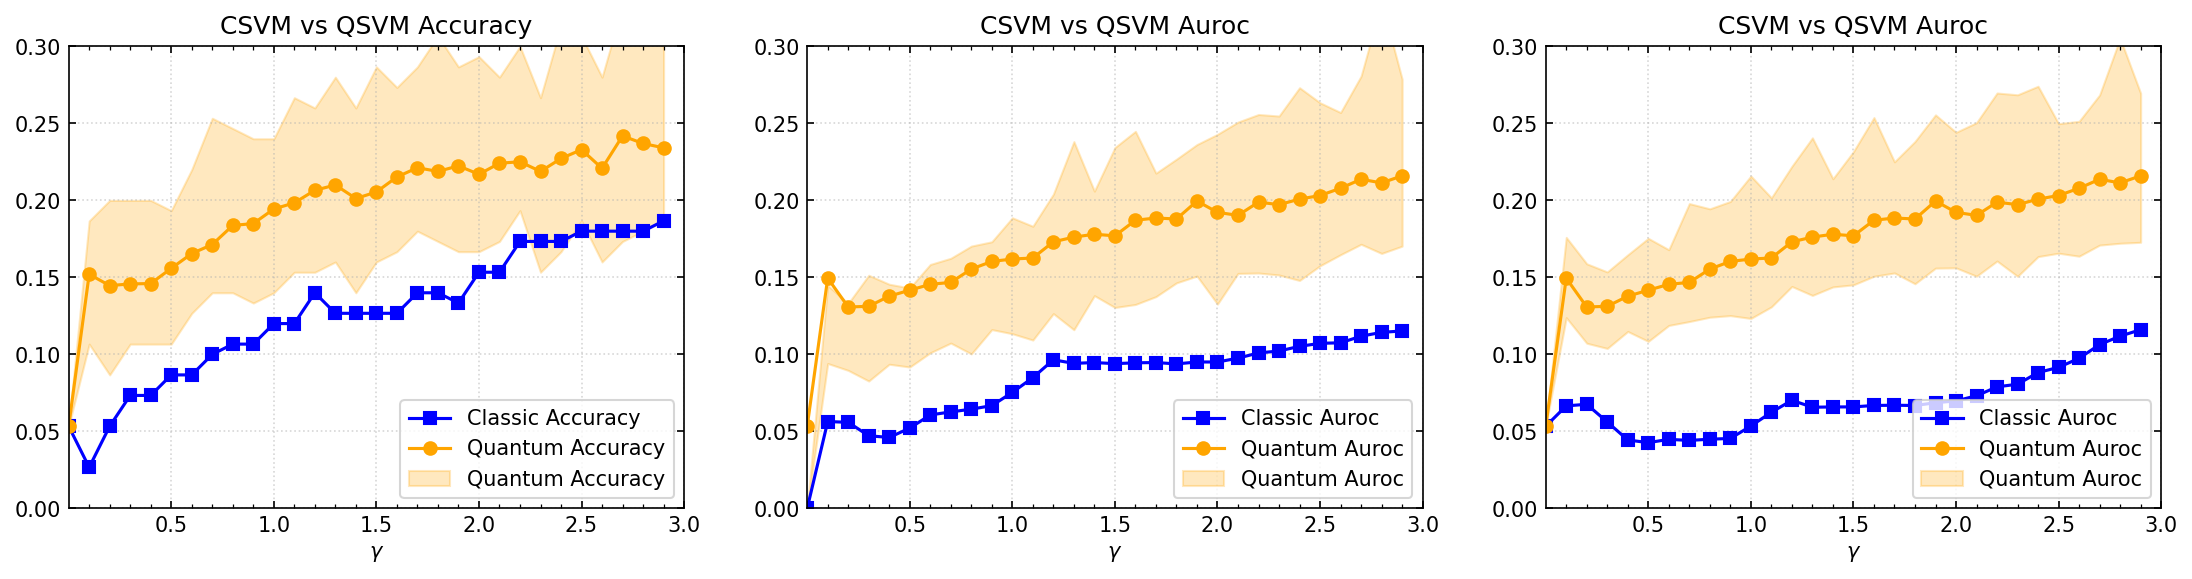

In [46]:
fig, axes = plt.subplots(
    1, 3,
    figsize=(18, 4),   # 전체 크기 고정
    dpi=150,
    sharex=True
)

axes[0].plot(gamma, C_gap_acc, "s-", color = "blue", label = "Classic Accuracy")
axes[0].plot(gamma, Q_gap_acc_max_mean, "o-", color = "orange", label = "Quantum Accuracy")
axes[0].fill_between(gamma, Acc_lower, Acc_upper, color = "orange", label = "Quantum Accuracy", alpha = 0.25)
axes[0].set_title("CSVM vs QSVM Accuracy")
axes[0].set_xlabel(u"${\gamma}$")
axes[0].set_ylim(0, 0.3)
axes[0].set_xlim(1e-6, 3)
axes[0].xaxis.set_major_locator(mticker.MultipleLocator(0.5))
axes[0].xaxis.set_minor_locator(mticker.MultipleLocator(0.1))
axes[0].xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axes[0].grid(which='major', linestyle=':', linewidth=0.8, alpha=0.5)
axes[0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
axes[0].legend(loc = "lower right")

axes[1].plot(gamma, C_gap_auroc, "s-", color = "blue", label = "Classic Auroc")
axes[1].plot(gamma, Q_gap_auprc_max_mean, "o-", color = "orange", label = "Quantum Auroc")
axes[1].fill_between(gamma, Auroc_lower, Auroc_upper, color = "orange", label = "Quantum Auroc", alpha = 0.25)
axes[1].set_title("CSVM vs QSVM Auroc")
axes[1].set_xlabel(u"${\gamma}$")
axes[1].set_ylim(0, 0.3)
axes[1].set_xlim(1e-6, 3)
axes[1].xaxis.set_major_locator(mticker.MultipleLocator(0.5))
axes[1].xaxis.set_minor_locator(mticker.MultipleLocator(0.1))
axes[1].xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axes[1].grid(which='major', linestyle=':', linewidth=0.8, alpha=0.5)
axes[1].tick_params(axis='both', which='both', direction='in', top=True, right=True)
axes[1].legend(loc = "lower right")

axes[2].plot(gamma, C_gap_auprc, "s-", color = "blue", label = "Classic Auroc")
axes[2].plot(gamma, Q_gap_auprc_max_mean, "o-", color = "orange", label = "Quantum Auroc")
axes[2].fill_between(gamma, Auprc_lower, Auprc_upper, color = "orange", label = "Quantum Auroc", alpha = 0.25)
axes[2].set_title("CSVM vs QSVM Auroc")
axes[2].set_xlabel(u"${\gamma}$")
axes[2].set_ylim(0, 0.3)
axes[2].set_xlim(1e-6, 3)
axes[2].xaxis.set_major_locator(mticker.MultipleLocator(0.5))
axes[2].xaxis.set_minor_locator(mticker.MultipleLocator(0.1))
axes[2].xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axes[2].grid(which='major', linestyle=':', linewidth=0.8, alpha=0.5)
axes[2].tick_params(axis='both', which='both', direction='in', top=True, right=True)
axes[2].legend(loc = "lower right")